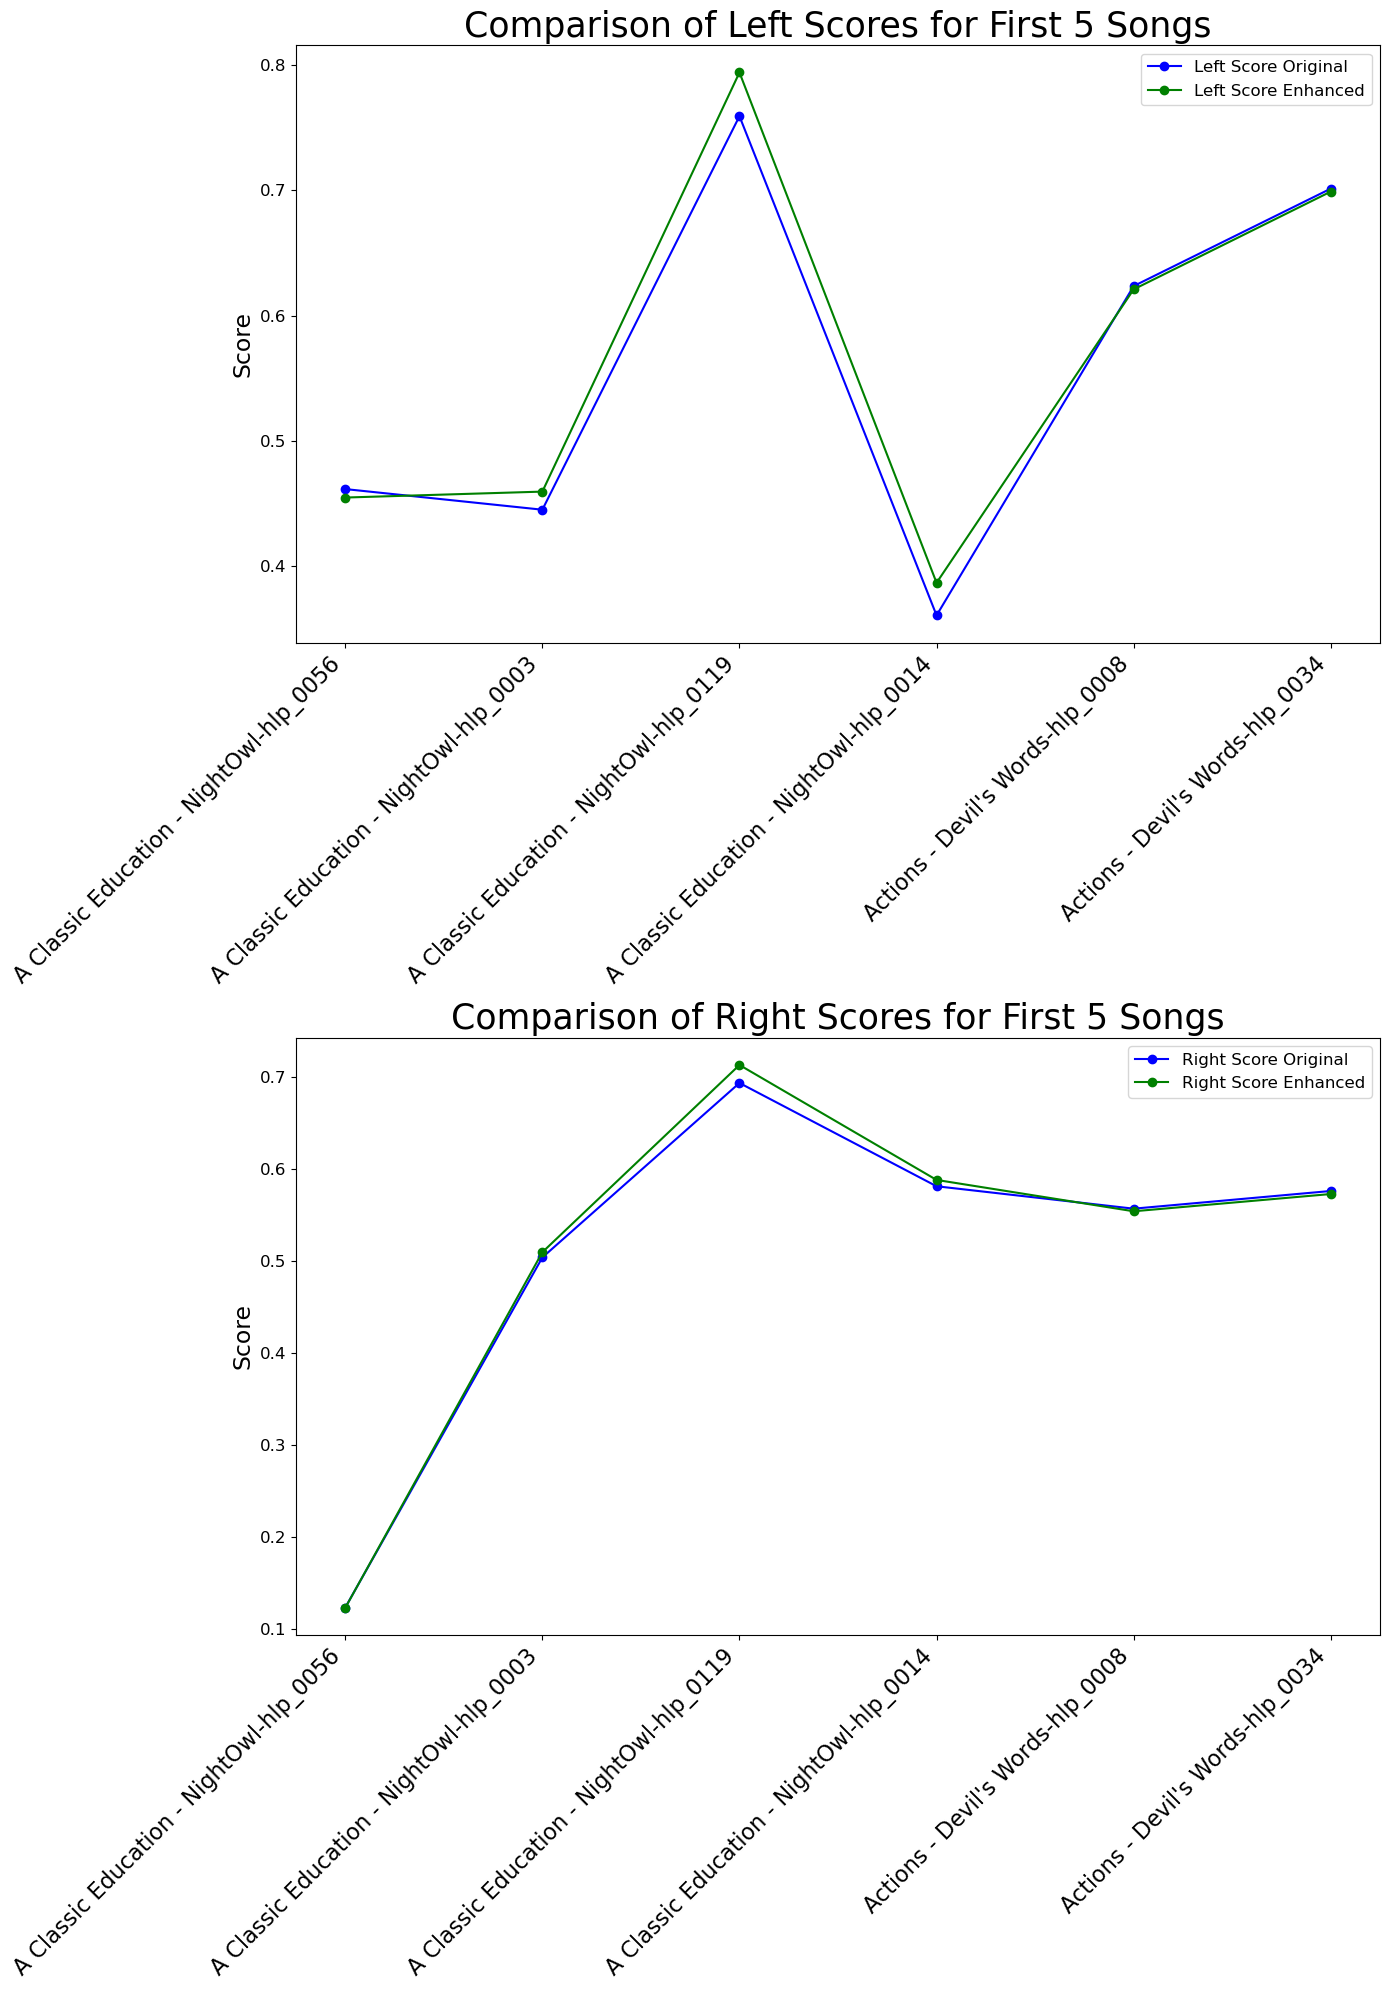

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV files
original_scores = pd.read_csv('/Users/jiazhenyu/Documents/GitHub/clarity-0.4.1/recipes/cad_icassp_2024/baseline/exp/scores/score_original.csv')
enhanced_scores = pd.read_csv('/Users/jiazhenyu/Documents/GitHub/clarity-0.4.1/recipes/cad_icassp_2024/baseline/exp/scores/scores_enhance.csv')

# Merge the dataframes on 'scene', 'song', and 'listener' to compare left and right scores
comparison = original_scores.merge(enhanced_scores, on=['scene', 'song', 'listener'], suffixes=('_original', '_enhanced'))

# Calculate the difference between the original and enhanced scores for left and right
comparison['left_score_diff'] = comparison['left_score_enhanced'] - comparison['left_score_original']
comparison['right_score_diff'] = comparison['right_score_enhanced'] - comparison['right_score_original']

# Filter the data for the first 5 songs
comparison_subset = comparison.groupby('song').head(1).head(6)

# Set up the plot
plt.figure(figsize=(14, 20))

# Plot left scores
plt.subplot(2, 1, 1)
# Plot left scores
plt.subplot(2, 1, 1)
plt.plot(comparison_subset['song'], comparison_subset['left_score_original'], marker='o', label='Left Score Original', color='blue')
plt.plot(comparison_subset['song'], comparison_subset['left_score_enhanced'], marker='o', label='Left Score Enhanced', color='green')
plt.title('Comparison of Left Scores for First 5 Songs', fontsize=25)
plt.ylabel('Score', fontsize=17)
plt.xticks(rotation=45, ha='right', fontsize=16)  # Rotate labels and align them to the right with larger font
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

# Plot right scores
plt.subplot(2, 1, 2)
plt.plot(comparison_subset['song'], comparison_subset['right_score_original'], marker='o', label='Right Score Original', color='blue')
plt.plot(comparison_subset['song'], comparison_subset['right_score_enhanced'], marker='o', label='Right Score Enhanced', color='green')
plt.title('Comparison of Right Scores for First 5 Songs', fontsize=25)
plt.ylabel('Score', fontsize=17)
plt.xticks(rotation=45, ha='right', fontsize=16)  # Rotate labels and align them to the right with larger font
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


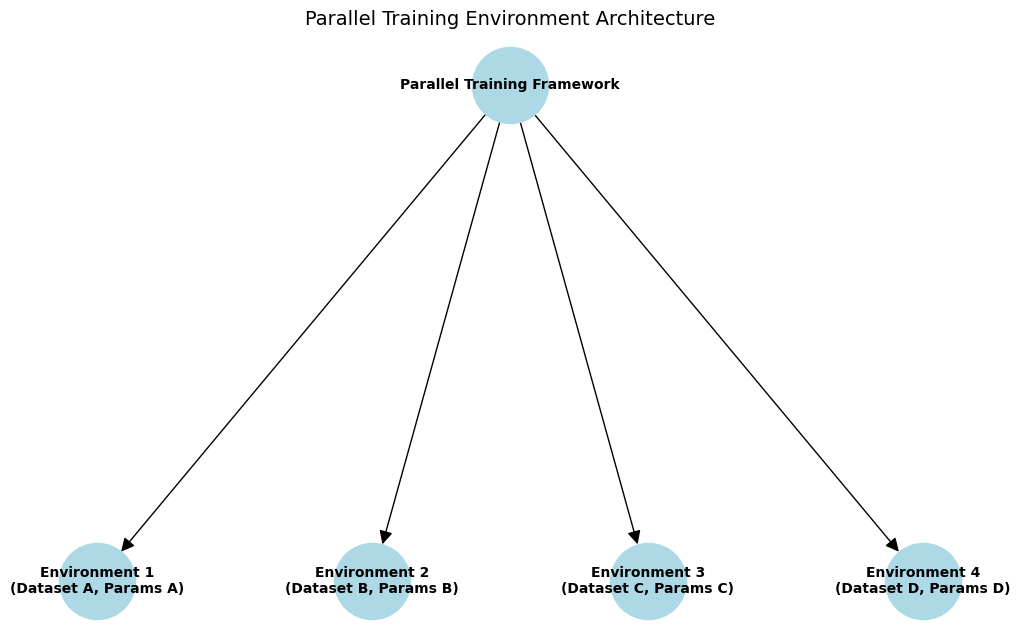

In [19]:
import matplotlib.pyplot as plt
import networkx as nx

# 创建有向图
G = nx.DiGraph()

# 添加节点（表示环境）
G.add_node("Parallel Training Framework", pos=(0, 2))
G.add_node("Environment 1\n(Dataset A, Params A)", pos=(-3, 0))
G.add_node("Environment 2\n(Dataset B, Params B)", pos=(-1, 0))
G.add_node("Environment 3\n(Dataset C, Params C)", pos=(1, 0))
G.add_node("Environment 4\n(Dataset D, Params D)", pos=(3, 0))

# 添加边（表示数据流）
G.add_edge("Parallel Training Framework", "Environment 1\n(Dataset A, Params A)")
G.add_edge("Parallel Training Framework", "Environment 2\n(Dataset B, Params B)")
G.add_edge("Parallel Training Framework", "Environment 3\n(Dataset C, Params C)")
G.add_edge("Parallel Training Framework", "Environment 4\n(Dataset D, Params D)")

# 获取节点位置
pos = nx.get_node_attributes(G, 'pos')

# 绘制图形
plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10, font_weight="bold", arrows=True, arrowstyle='-|>', arrowsize=20)
plt.title("Parallel Training Environment Architecture", fontsize=14)
plt.show()


In [21]:
import pandas as pd


# Load the CSV file
file_path = '/Users/jiazhenyu/Documents/GitHub/clarity-0.4.1/recipes/cad_icassp_2024/baseline/exp/training_log_small_version_7.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
data.head()


,Episode,Step,Reward,Bass_params_left,Bass_params_right,Other_params_left,Other_params_right,Drums_params_left,Drums_params_right,HAAQI_score_left,HAAQI_score_right,HAAQI_score,Original HAAQI_score,Done
0,0,1,-215.301153,[-20. 3.8 97. 358. ],[-12. 4.7 17. 917. ],[-32. 2. 96. 982.],[-37. 2. 98. 37.],[ -28. 4.3 22. 1318. ],[ -38. 3. 22. 1199.],0.457485,0.122542,0.290014,0.292167,False
1,2,1,-6712.412170,[ -6. 5.8 86. 896. ],[-36. 6.2 22. 945. ],[-12. 2.2 80. 991. ],[ -14. 5.5 61. 1400. ],[ -7. 3.3 43. 1246. ],[-22. 4.9 40. 357. ],0.409209,0.405414,0.407312,0.474436,False
2,3,1,-15212.035208,[ -15. 5.6 34. 1690. ],[ -39. 2.1 61. 1354. ],[ -23. 6.7 58. 1478. ],[-29. 3.4 33. 459. ],[ -4. 5.1 25. 2007. ],[ -34. 6. 56. 1676.],0.142320,0.390669,0.266494,0.418615,False
3,1,1,-14079.822792,[ -12. 4.8 56. 1006. ],[ -3. 5.3 54. 671. ],[-18. 2.8 26. 849. ],[-40. 3.3 72. 564. ],[ -34. 4.7 37. 1650. ],[ -4. 4.4 80. 1432. ],0.471251,0.220685,0.345968,0.486766,False
4,3,2,87.156203,[-35. 2.9 32. 887. ],[ -6. 2.9 93. 1300. ],[ -11. 2.4 22. 1181. ],[-14. 5.4 64. 854. ],[ -8. 3.2 83. 1952. ],[ -6. 2.3 95. 487. ],0.476363,0.362610,0.419486,0.418615,False


In [23]:
# Calculate the percentage improvement of HAAQI score over episodes
initial_score = data['Original HAAQI_score'].iloc[0]
final_score = data['HAAQI_score'].iloc[-1]

# Percentage improvement
percentage_improvement = ((final_score - initial_score) / initial_score) * 100

percentage_improvement

0.3193495777497463


9.303809543390717

In [36]:
# Recreate the episodes list since it was defined in the previous context
episodes = [3, 4, 5, 6]

# Recalculate the percentage improvement for the last step in each episode compared to the initial score

# Create a dictionary to store improvements
episode_improvements = {}

# Calculate improvements for each episode
for episode in episodes:
    episode_data = filtered_data_steps[filtered_data_steps['Episode'] == episode]
    final_haaqi = episode_data['HAAQI_score'].iloc[-1]
    improvement = ((final_haaqi - initial_score) / initial_score) * 100
    episode_improvements[episode] = improvement

episode_improvements

# Convert the improvements dictionary to a DataFrame
improvement_df = pd.DataFrame(list(episode_improvements.items()), columns=['Episode', 'HAAQI Score Improvement (%)'])

# Display the DataFrame as a table
print(improvement_df.to_string(index=False))

 Episode  HAAQI Score Improvement (%)
       3                    62.959212
       4                   159.307080
       5                     9.594083
       6                    68.426376


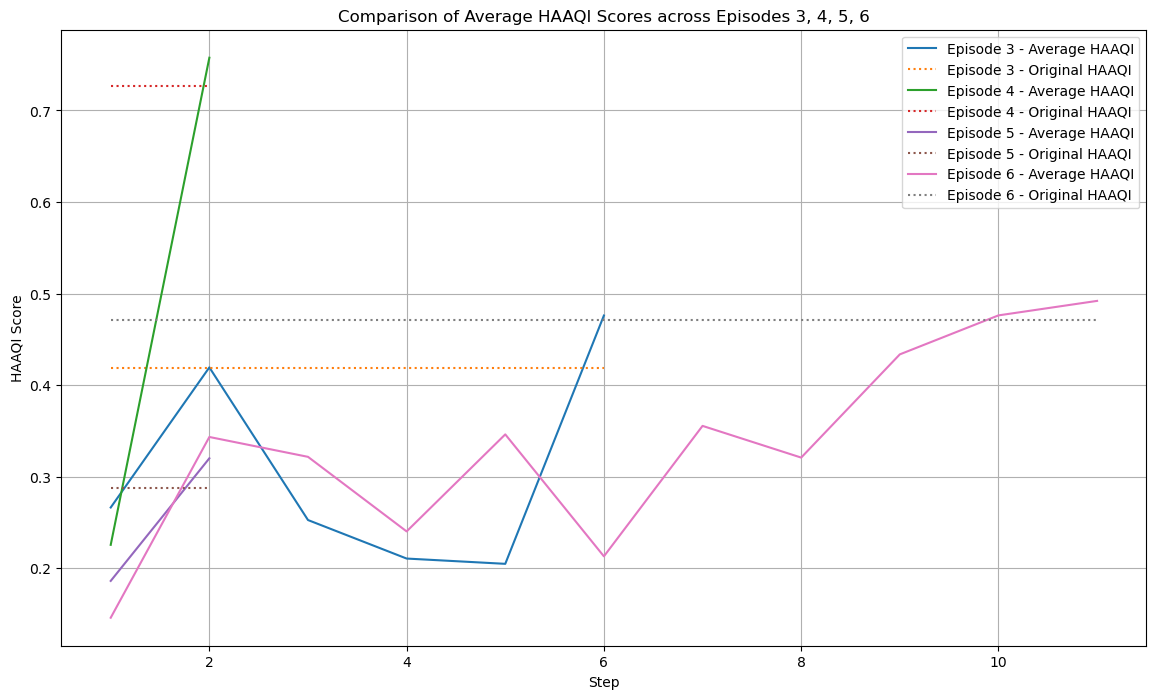

In [30]:
# Filter necessary columns
filtered_data_steps = filtered_data[['Step', 'HAAQI_score', 'Original HAAQI_score', 'Episode']]

# Plot the data for each episode without left and right HAAQI scores
plt.figure(figsize=(14, 8))

# Plot for Episode 3
episode_3_data = filtered_data_steps[filtered_data_steps['Episode'] == 3]
plt.plot(episode_3_data['Step'], episode_3_data['HAAQI_score'], label='Episode 3 - Average HAAQI')
plt.plot(episode_3_data['Step'], episode_3_data['Original HAAQI_score'], label='Episode 3 - Original HAAQI', linestyle='dotted')

# Plot for Episode 4
episode_4_data = filtered_data_steps[filtered_data_steps['Episode'] == 4]
plt.plot(episode_4_data['Step'], episode_4_data['HAAQI_score'], label='Episode 4 - Average HAAQI')
plt.plot(episode_4_data['Step'], episode_4_data['Original HAAQI_score'], label='Episode 4 - Original HAAQI', linestyle='dotted')

# Plot for Episode 5
episode_5_data = filtered_data_steps[filtered_data_steps['Episode'] == 5]
plt.plot(episode_5_data['Step'], episode_5_data['HAAQI_score'], label='Episode 5 - Average HAAQI')
plt.plot(episode_5_data['Step'], episode_5_data['Original HAAQI_score'], label='Episode 5 - Original HAAQI', linestyle='dotted')

# Plot for Episode 6
episode_6_data = filtered_data_steps[filtered_data_steps['Episode'] == 6]
plt.plot(episode_6_data['Step'], episode_6_data['HAAQI_score'], label='Episode 6 - Average HAAQI')
plt.plot(episode_6_data['Step'], episode_6_data['Original HAAQI_score'], label='Episode 6 - Original HAAQI', linestyle='dotted')

# Adding labels and title
plt.xlabel('Step')
plt.ylabel('HAAQI Score')
plt.title('Comparison of Average HAAQI Scores across Episodes 3, 4, 5, 6')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


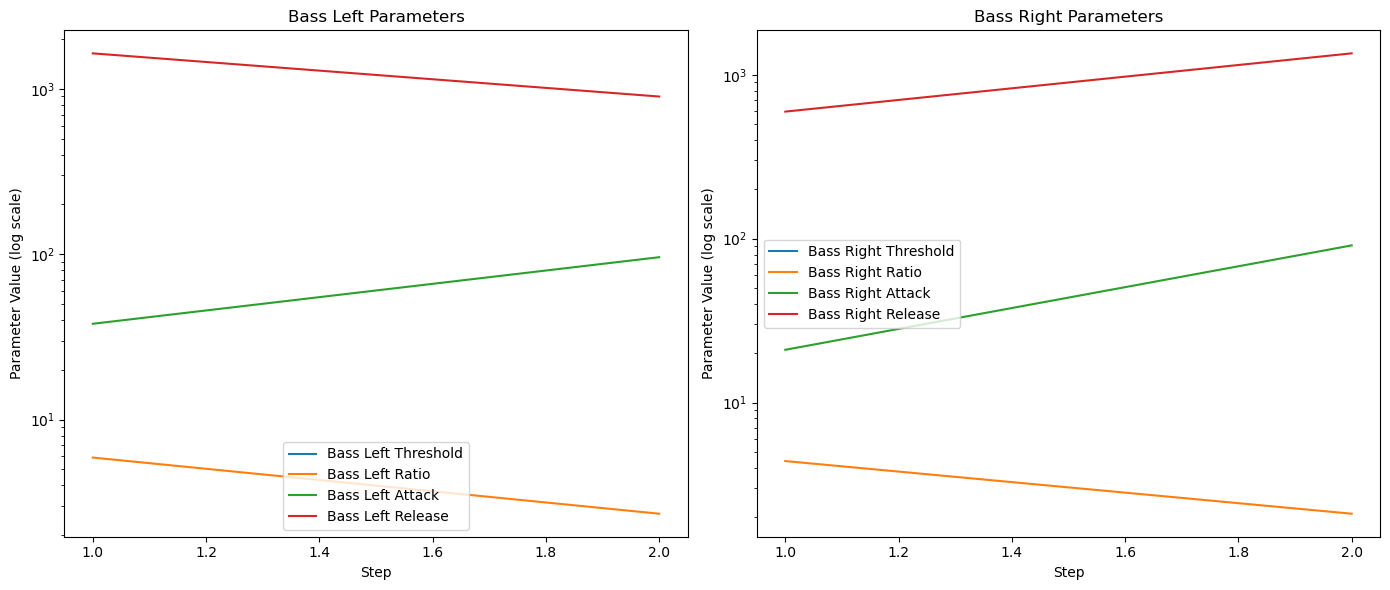

In [40]:
# Extract parameters for Bass, Drum, and Other (Left and Right)
def extract_params(param_column):
    param_values = episode_4_data[param_column].apply(lambda x: list(map(float, x.strip('[]').split())))
    threshold = param_values.apply(lambda x: x[0])
    ratio = param_values.apply(lambda x: x[1])
    attack = param_values.apply(lambda x: x[2])
    release = param_values.apply(lambda x: x[3])
    return threshold, ratio, attack, release

# Extract for Bass Left and Right
bass_left_threshold, bass_left_ratio, bass_left_attack, bass_left_release = extract_params('Bass_params_left')
bass_right_threshold, bass_right_ratio, bass_right_attack, bass_right_release = extract_params('Bass_params_right')

# Plotting with labels and title
plt.figure(figsize=(14, 6))

# Bass Left Parameters
plt.subplot(1, 2, 1)
plt.plot(episode_4_data['Step'], bass_left_threshold, label='Bass Left Threshold')
plt.plot(episode_4_data['Step'], bass_left_ratio, label='Bass Left Ratio')
plt.plot(episode_4_data['Step'], bass_left_attack, label='Bass Left Attack')
plt.plot(episode_4_data['Step'], bass_left_release, label='Bass Left Release')
plt.yscale('log')  # Use log scale
plt.xlabel('Step')
plt.ylabel('Parameter Value (log scale)')
plt.title('Bass Left Parameters')
plt.legend()

# Bass Right Parameters
plt.subplot(1, 2, 2)
plt.plot(episode_4_data['Step'], bass_right_threshold, label='Bass Right Threshold')
plt.plot(episode_4_data['Step'], bass_right_ratio, label='Bass Right Ratio')
plt.plot(episode_4_data['Step'], bass_right_attack, label='Bass Right Attack')
plt.plot(episode_4_data['Step'], bass_right_release, label='Bass Right Release')
plt.yscale('log')  # Use log scale
plt.xlabel('Step')
plt.ylabel('Parameter Value (log scale)')
plt.title('Bass Right Parameters')
plt.legend()

plt.tight_layout()
plt.show()

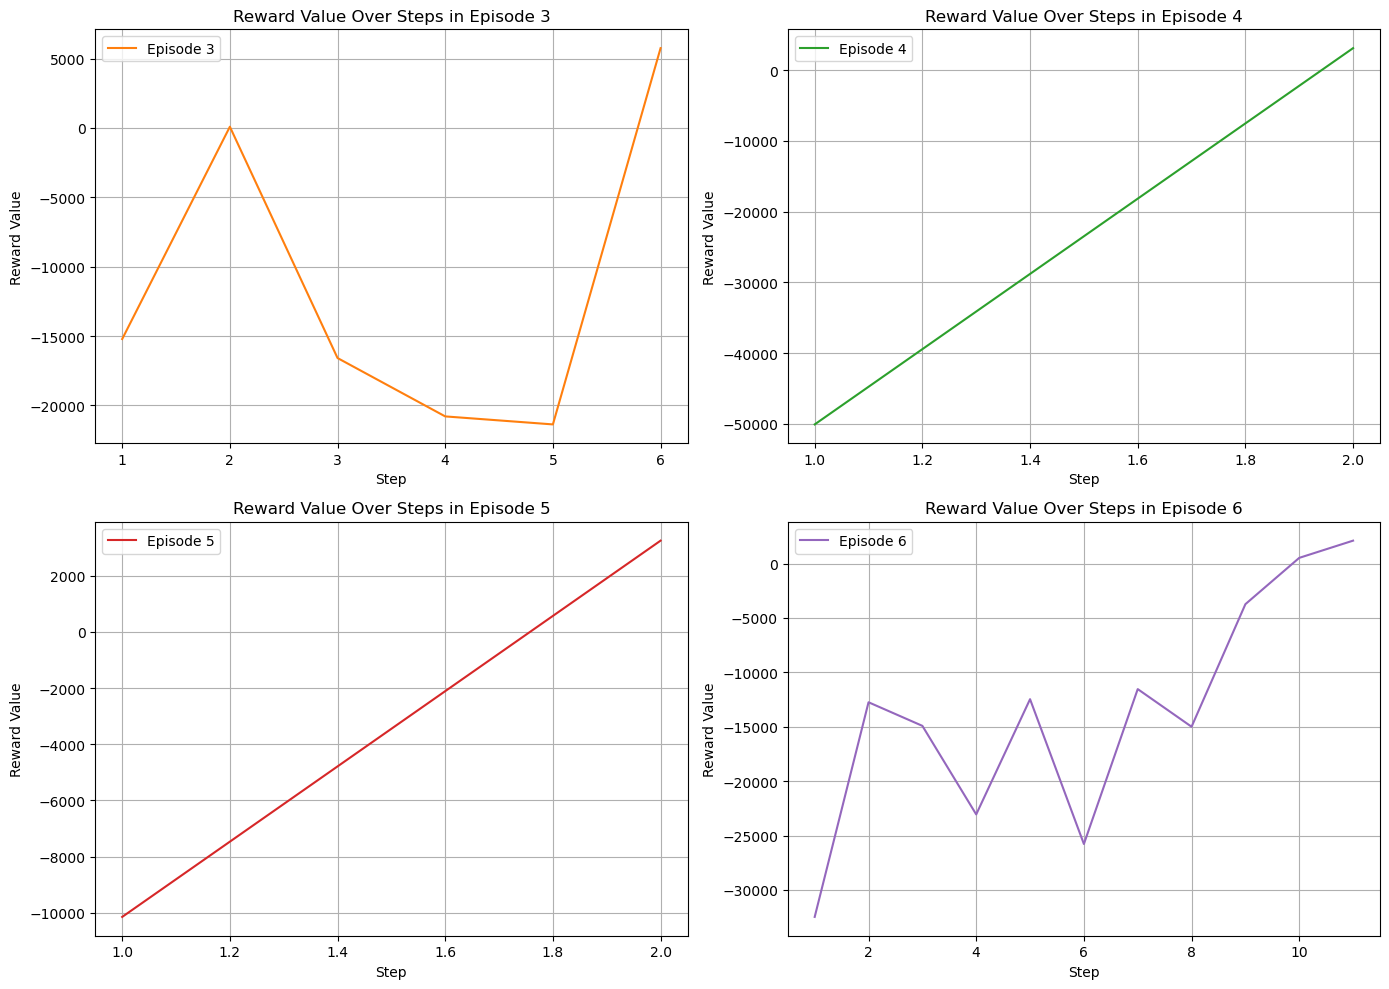

In [43]:
# Plotting Reward Value over Steps for Episode 3, 4, 5, 6 separately but in one figure

# Define the number of rows and columns for subplots
n_rows = 2
n_cols = 2

plt.figure(figsize=(14, 10))

# Plotting each episode in a separate subplot
for i, episode in enumerate(episodes_to_plot, 1):
    episode_data = filtered_data[filtered_data['Episode'] == episode]
    plt.subplot(n_rows, n_cols, i)
    plt.plot(episode_data['Step'], episode_data['Reward'], label=f'Episode {episode}', color=f'C{i}')
    plt.xlabel('Step')
    plt.ylabel('Reward Value')
    plt.title(f'Reward Value Over Steps in Episode {episode}')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

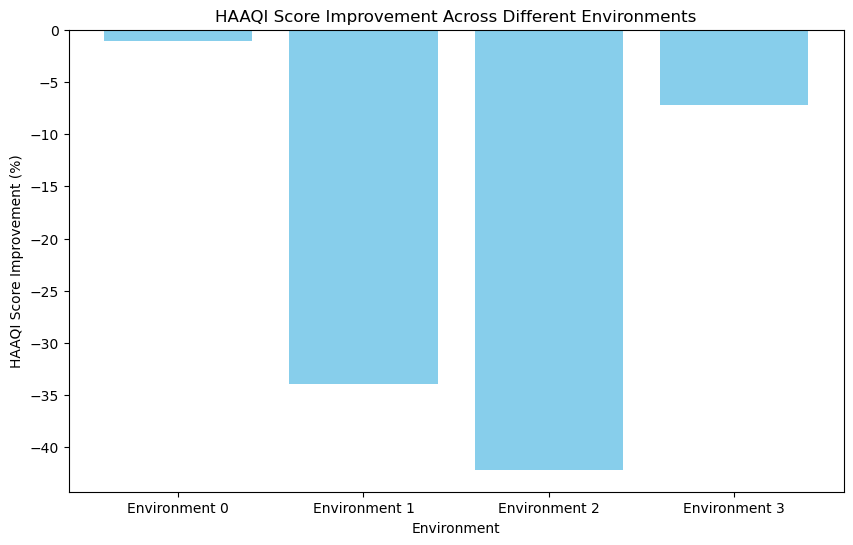

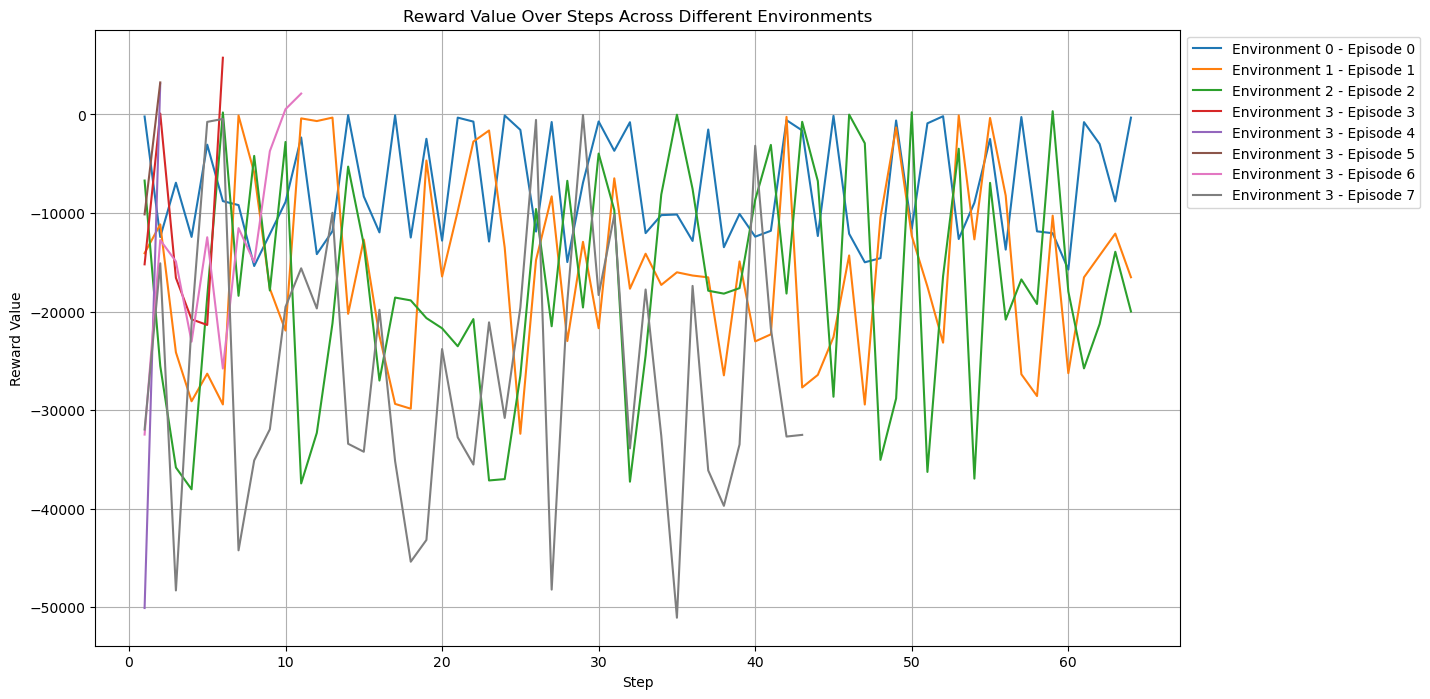

In [44]:
# Adjust the environments based on the given mapping
env_mapping = {
    0: [0],
    1: [1],
    2: [2],
    3: [3, 4, 5, 6, 7]
}

# Calculate HAAQI score improvement for each environment
haaqi_improvements = {}

for env, episodes in env_mapping.items():
    initial_haaqi_list = []
    final_haaqi_list = []
    
    for episode in episodes:
        env_data = data[data['Episode'] == episode]
        initial_haaqi = env_data['Original HAAQI_score'].iloc[0]
        final_haaqi = env_data['HAAQI_score'].iloc[-1]
        initial_haaqi_list.append(initial_haaqi)
        final_haaqi_list.append(final_haaqi)
    
    # Calculate the average improvement across episodes in the environment
    avg_initial_haaqi = sum(initial_haaqi_list) / len(initial_haaqi_list)
    avg_final_haaqi = sum(final_haaqi_list) / len(final_haaqi_list)
    haaqi_improvements[env] = (avg_final_haaqi - avg_initial_haaqi) / avg_initial_haaqi * 100

# Plot HAAQI improvements
plt.figure(figsize=(10, 6))
plt.bar([f'Environment {env}' for env in env_mapping.keys()], haaqi_improvements.values(), color='skyblue')
plt.xlabel('Environment')
plt.ylabel('HAAQI Score Improvement (%)')
plt.title('HAAQI Score Improvement Across Different Environments')
plt.show()

# Plot Reward Value over Steps for different environments
plt.figure(figsize=(14, 8))

for env, episodes in env_mapping.items():
    for episode in episodes:
        env_data = data[data['Episode'] == episode]
        plt.plot(env_data['Step'], env_data['Reward'], label=f'Environment {env} - Episode {episode}')

plt.xlabel('Step')
plt.ylabel('Reward Value')
plt.title('Reward Value Over Steps Across Different Environments')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()